In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #to normalize inputs
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

## DATA

In [4]:
data = pd.read_csv('data.csv')
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [6]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

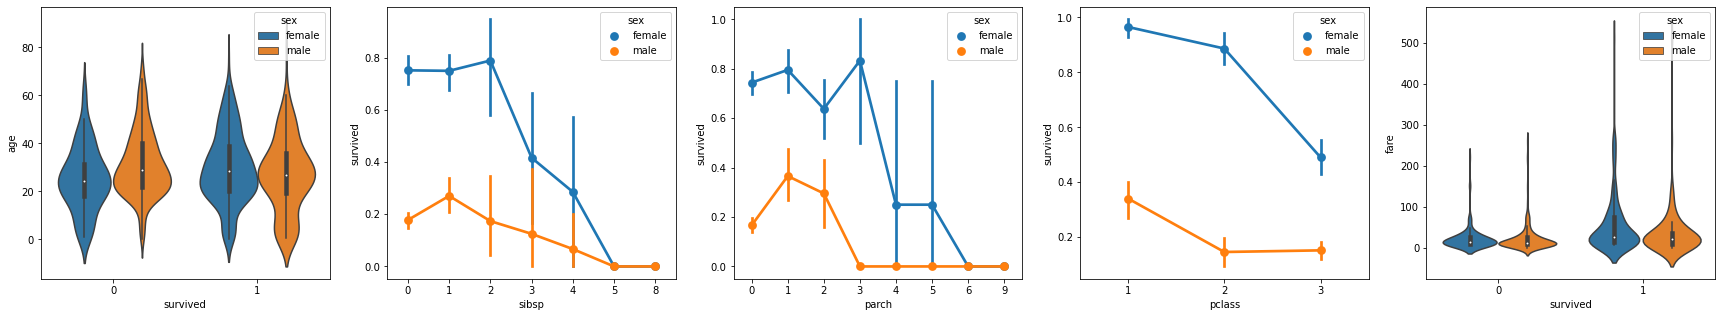

In [14]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [15]:
#changing data types from string to numeric to find correlation 
data.replace({'male': 1, 'female': 0}, inplace=True)

In [16]:
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [17]:
#checking if passengers had relatives on board and creating new variable (did a person have relatives not how many relatives)
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [19]:
#drop parch (parents or childrens) and sibsp (siblings or spouse) and drop rows with NaNs
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [31]:
data.count()

sex          1045
pclass       1045
age          1045
relatives    1045
fare         1045
survived     1045
dtype: int64

## MODEL

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [29]:
#normalizing inputs
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [33]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [36]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
print(metrics.balanced_accuracy_score(y_test, predict_test))

0.7464114832535885
0.722704475308642


## NN

In [43]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [48]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5)) #5 because sex, pclass, age, relatives, and fare= 5 inputs
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) #1 output because i want to know '1' or '0'

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 98
Trainable params: 98
Non-trainable params: 0
__________________________________________________________

In [50]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 943us/step - loss: 0.6922 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.5861
Epoch 11/50
27/27

In [51]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8086124401913876
